In [123]:
import pickle
import pandas as pd
import numpy as np
import folium

In [141]:
atm = pickle.load(open('result_final.data', 'rb'))

In [142]:
X = atm[~atm.lat.isnull()]

In [143]:
X.columns = ['atm_acqbin', 'atm_caid', 'atm_terminal', 'full_address', 'target',
             'log_target', 'address', 'city', 'address_rus', 'lat', 'long',
             'adress']

In [144]:
X['address_rus'] = X.adress

In [145]:
del X['adress']

In [146]:
X.atm_acqbin  = X.atm_acqbin.rank()

In [147]:
X['id'] = X.atm_caid.rank().apply(str) + '_' + X.atm_terminal.rank().apply(str)

In [148]:
# Дубликаты
X = X[~X.index.isin((10771,8110,10768))]

In [149]:
X.shape

(8808, 12)

In [150]:
# Оставляем только те банкоматы которые в России
X = X[X.address_rus.apply(lambda x: 'Россия' in x)]

In [151]:
X = X[~X.address_rus.apply(lambda x: 'остров Крупской' in x)]

In [153]:
X.shape

(8765, 12)

In [154]:
# Улалим адреса, широту и долготу тех банкоматов, которые не определились с точностью до дома
X[X.address_rus.apply(lambda x: len(x.split(','))) < 4]

atm_acqbin  atm_caid atm_terminal  \
8            32.0       155     ATM00023   
20           32.0       166     ATM02235   
55           32.0       256     ATM03755   
602         496.5  ATM 0892     S1AM0892   
711         496.5  ATM 1910     S1AM1910   
724         496.5  ATM 2040     S1AM2040   
746         496.5  ATM 2280     S1AM2280   
958         496.5  ATM 4020     S1AM4020   
978         496.5  ATM 4154     S1AM4154   
1124        496.5  ATM 5089     S1AM5089   
1289        496.5  ATM 5876     S1AM5876   
1293        496.5  ATM 5920     S1AM5920   
1452       1022.0      1063         1063   
1572       1022.0       461          461   
1660       1022.0       971          971   
1730       1942.0  Alfa Acq       220390   
1744       1942.0  Alfa Acq       220888   
1777       1942.0  Alfa Acq       502315   
1818       1942.0  Alfa Iss       132099   
1869       1942.0  Alfa Iss       150777   
1872       1942.0  Alfa Iss       150783   
1873       1942.0  Alfa Iss       150787   
1883       1942.0  Alfa Iss       150923   
1889       1942.0  Alfa Iss       151527   
1915       1942.0  Alfa Iss       151905   
1963       1942.0  Alfa Iss       152845   
1984       1942.0  Alfa Iss       153469   
2013       1942.0  Alfa Iss       155424   
2021       1942.0  Alfa Iss       155458   
2059       1942.0  Alfa Iss       155894   
...           ...       ...          ...   
11699      8083.0   ROSBANK     ATM54900   
11715      8083.0   ROSBANK     ATM54955   
11776      8083.0   ROSBANK     ATM55919   
11789      8083.0   ROSBANK     ATM55965   
11807      8083.0   ROSBANK     ATM56050   
11821      8083.0   ROSBANK     ATM56082   
11847      8083.0   ROSBANK     ATM60003   
11870      8083.0   ROSBANK     ATM60031   
11899      8083.0   ROSBANK     ATM60069   
12006      8083.0   ROSBANK     ATM60407   
12046      8083.0   ROSBANK     ATM60538   
12062      8083.0   ROSBANK     ATM61036   
12067      8083.0   ROSBANK     ATM61059   
12095      8083.0   ROSBANK     ATM70002   
12111      8083.0   ROSBANK     ATM70072   
12170      8083.0   ROSBANK     ATM70283   
12220      8083.0   ROSBANK     ATM70447   
12305      8083.0   ROSBANK     ATM70725   
12335      8083.0   ROSBANK     ATM70808   
12377      8083.0   ROSBANK     ATM70918   
12381      8083.0   ROSBANK     ATM70927   
12432      8083.0   ROSBANK     ATM71054   
12490      8083.0   ROSBANK     ATM71174   
12549      8083.0   ROSBANK     ATM71282   
12572      8083.0   ROSBANK     ATM71326   
12579      8083.0   ROSBANK     ATM71341   
12690      8083.0   ROSBANK     ATM71578   
12737      8083.0   ROSBANK     ATM71680   
12811      8083.0   ROSBANK     ATM71886   
12828      8083.0   ROSBANK     ATM71924   

                                 full_address        target  log_target  \
8      SAKHALINSKAYA, 69      Y. SAKHALINSK    1.754910e+09   21.285683   
20     KHIMKI, MOSKOVSKAYA, 14MOSCOW           2.380000e+07   16.985196   
55     PR.100LET VLADIV,88    VLADIVOSTOK      6.290000e+07   17.957057   
602    J.KUDRIAVOGO 24           KHANDYGA      1.133200e+08   18.545726   
711    MOLCHANOVA 22             PARATUNKA     1.390500e+08   18.750344   
724    50-LET BELGORODSK. OB. 11 BELGOROD      3.069000e+07   17.239447   
746    PER. BAZARNY 4            SPASSK-DALNY  4.635500e+08   19.954425   
958    LIPETSKAYA 28             INSKOY        4.138000e+07   17.538308   
978    SOVETSKAYA 25             S. MAYA       2.246000e+07   16.927247   
1124   NOVIY BLVD, 5             DOLGOPRUDNIY  4.015000e+08   19.810718   
1289   HO CHI MIHN AVE, 19       ULYANOVSK     3.946000e+07   17.490798   
1293   3-RD DACHNAYA             SARATOV       1.314200e+08   18.693909   
1452   ABB 158 KRASNOKOKSH-AYA   KAZAN         3.273500e+07   17.303955   
1572   ABB 6B NAB-CHELNINSKIJ    NAB.CHELNY    1.349180e+07   16.417593   
1660   ABB 111 KRASNOARMEJSK.    JOSHKAR-OLA   2.853000e+07   17.166467   
1730   49 CHERNOISTOCHENSKOE H/W NIZHNIY TAGI  2.606900e+08   19.378843   
174

In [155]:
X.loc[X.address_rus.apply(lambda x: len(x.split(','))) < 4, ['address_rus','lat', 'long']] = np.nan

In [156]:
sum(~X.address_rus.isnull()), sum(X.address_rus.isnull())

(8345, 420)

In [157]:
X['std_log_target'] = (X.log_target - X.log_target.mean())/ X.log_target.mean()

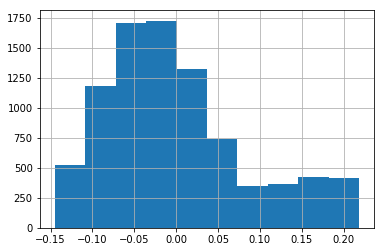

In [158]:
%matplotlib inline
X['std_log_target'].hist()

In [159]:
X.rename(columns={'atm_acqbin': 'atm_group', 'full_address':'transaction_address'},inplace=True)

In [160]:
from sklearn.model_selection import StratifiedKFold

In [161]:
labels = X.atm_caid == 'ROSBANK'
result = []
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, labels):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    result.append(test_index)

TRAIN: 7303 TEST: 1462
TRAIN: 7303 TEST: 1462
TRAIN: 7304 TEST: 1461
TRAIN: 7305 TEST: 1460
TRAIN: 7305 TEST: 1460
TRAIN: 7305 TEST: 1460


In [162]:
train_index = np.concatenate(result[:4])

In [163]:
private_index = result[4]

In [164]:
public_index = result[5]

In [165]:
X_train = X.iloc[train_index]

In [166]:
X_public = X.iloc[public_index]

In [167]:
X_private = X.iloc[private_index]

In [168]:
X_train.reset_index(drop=True, inplace=True)
X_public.reset_index(drop=True, inplace=True)
X_private.reset_index(drop=True, inplace=True)

In [169]:
X_train_clear = X_train[['atm_group', 'transaction_address', 'address_rus','lat','long', 'std_log_target']]

In [170]:
X_public_clear = X_public[['atm_group', 'transaction_address', 'address_rus','lat','long']]
Y_public_clear = X_public['std_log_target']

In [171]:
X_private_clear = X_private[['atm_group','transaction_address', 'address_rus','lat','long']]
Y_private_clear = X_private['std_log_target']

In [172]:
X_train_clear.head()

atm_group                     transaction_address  \
0       32.0  SHKOLNAYA, 16          NORILSK           
1       32.0  GUBAREVICHA, 5         ELISTRA           
2       32.0  KUBANSKAYA, 23, 2      ASTRAKHAN         
3       32.0  LOPSANCHAPA, 37        KYZYL             
4       32.0  PR.100LET VLADIV,88    VLADIVOSTOK       

                                         address_rus        lat       long  \
0  Школьная улица, 16, Норильск, Красноярский кра...  69.350498  87.755207   
1  улица Губаревича, 5, Элиста, Республика Калмык...  46.307687  44.272795   
2   Кубанская улица, 23к2, Астрахань, Россия, 414057  46.326870  48.039745   
3  улица Ооржака Лопсанчапа, 37, Кызыл, Республик...  51.698593  94.419826   
4                                                NaN        NaN        NaN   

   std_log_target  
0        0.187148  
1        0.139543  
2        0.096589  
3        0.170253  
4       -0.064829

In [173]:
X_train_clear.to_csv('./hack/X_train_clear.csv')
X_public_clear.to_csv('./hack/X_public_clear.csv')
Y_public_clear.to_csv('./hack/Y_public_clear.csv')
X_private_clear.to_csv('./hack/X_private_clear.csv')
Y_private_clear.to_csv('./hack/Y_private_clear.csv')

In [174]:
map = folium.Map(location=(55.751244, 37.618423), zoom_start=6)

for i, row in X.dropna().iterrows():
    folium.CircleMarker((row.lat, row.long),
                    radius=5,
                    #popup='{}, Росбанк: {}'.format(owner, adress),
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(map)

In [ ]:
map.save(outfile='./hack/world_map.html')